In [1]:
from pathlib import Path

In [5]:

cwd = Path.cwd()
data_path = cwd / "data" / "Dry_Bean_Dataset.xlsx"

In [7]:
import pandas as pd

beans = pd.read_excel(data_path)
beans.to_parquet(cwd / "data" / "dry_bean.parquet", index=False)

In [34]:
import pandas as pd

data_path = r'data\prediction_data_emotion_7thNov.csv'

data = pd.read_csv(data_path)

In [35]:
data.head()

,id,subject,label,validated_label,cleaned_body,validation,prediction_classification,classification_label,classification_score,prediction_emotions,emotion_label,emotion_score,m_label,emotion
0,f2752080-0b53-4f47-8683-4167e99b8190,RE: FW: Invoice PIVDC/2024/B10627 from PINNACL...,0,0,Are you able to send me the worklogs please? I...,0.0,"[{'label': 'LABEL_0', 'score': 0.5044412016868...",1,0.504,"[{'label': 'gratitude', 'score': 0.73253202438...",0,0.733,0,gratitude
1,0d62e5be-e7a5-4738-a23e-df479608b3b3,RE: FW: Meeting Recording,0,0,"Hey, our office got flooded last night and Im ...",0.0,"[{'label': 'LABEL_0', 'score': 0.5561059713363...",1,0.556,"[{'label': 'neutral', 'score': 0.4086275100708...",1,0.409,1,neutral
2,9097b5a1-972c-40d8-8b9a-648803fd45ec,RE: EXTERNAL MAILAmaala_ Medical Wellness_ Tea...,1,1,"Dear Chirag, Still, I dont think that the Mode...",NaN,"[{'label': 'LABEL_0', 'score': 0.6087769865989...",1,0.609,"[{'label': 'disapproval', 'score': 0.488710999...",1,0.489,1,disapproval
3,e927b00f-4a56-4082-811d-b315f5723c75,Re: B1553 QTS DC-2 _Roof Chiller Skid,0,0,"So when I draw, I have Show Pipe Disconnects t...",0.0,"[{'label': 'LABEL_0', 'score': 0.7345722317695...",1,0.735,"[{'label': 'optimism', 'score': 0.528367340564...",0,0.528,0,optimism
4,ea9e1717-75ee-4337-baeb-ddf871a63440,Guildhall Drainage Layout Mark Up,0,0,Hi Boja Please see attached drainage mark ups ...,0.0,"[{'label': 'LABEL_0', 'score': 0.6465821266174...",1,0.647,"[{'label': 'neutral', 'score': 0.8599736690521...",1,0.860,1,neutral


In [61]:
emotion_mapping = {
    'remorse': 0,
    'sadness': 1,
    'disappointment': 1,
    'neutral': 1,
    'embarrassment': 1,
    'realization': 0,
    'disapproval': 1,
    'annoyance': 1,
    'approval': 1,
    'caring': 1,
    'gratitude': 0,
    'curiosity': 1,
    'optimism': 1,
    'confusion': 1,
    'grief': 1,
    'desire': 1,
    'amusement': 1,
    'love': 0,
    'anger': 1,
    'joy': 0,
    'admiration':0,
    'nervousness': 1,
    'disgust': 1,
    'relief': 1,
    'excitement': 0,
    'surprise': 1,
    'fear': 1,
    'pride': 0    
}

In [62]:
import ast

# # Convert string representation of lists to actual lists of dictionaries
# data['prediction_emotions'] = data['prediction_emotions'].apply(ast.literal_eval)

# Now apply the lambda function to extract the label
data['emotion_label'] = data['prediction_emotions'].apply(
    lambda x: emotion_mapping.get(x[0]['label'], 'Unknown') if isinstance(x, list) and len(x) > 0 else 'Unknown'
)


In [66]:
data['m_label'] = data.apply(lambda x: 0 if ((x['classification_label'] == 1) & (x['emotion_label'] == 0))
                                         else x['classification_label'], axis=1)

In [81]:
data['thres_label'] = data.apply(lambda x: 1 if (x['classification_label'] == 1 and x['classification_score'] >= 0.5) else 0, axis=1)

In [82]:
data.head()

,id,subject,label,validated_label,cleaned_body,validation,prediction_classification,classification_label,classification_score,prediction_emotions,emotion_label,emotion_score,m_label,emotion,emotion_test,thres_label
0,f2752080-0b53-4f47-8683-4167e99b8190,RE: FW: Invoice PIVDC/2024/B10627 from PINNACL...,0,0,Are you able to send me the worklogs please? I...,0.0,"[{'label': 'LABEL_0', 'score': 0.5044412016868...",1,0.504,"[{'label': 'gratitude', 'score': 0.73253202438...",0,0.733,0,gratitude,Unknown,1
1,0d62e5be-e7a5-4738-a23e-df479608b3b3,RE: FW: Meeting Recording,0,0,"Hey, our office got flooded last night and Im ...",0.0,"[{'label': 'LABEL_0', 'score': 0.5561059713363...",1,0.556,"[{'label': 'neutral', 'score': 0.4086275100708...",1,0.409,1,neutral,Unknown,1
2,9097b5a1-972c-40d8-8b9a-648803fd45ec,RE: EXTERNAL MAILAmaala_ Medical Wellness_ Tea...,1,1,"Dear Chirag, Still, I dont think that the Mode...",NaN,"[{'label': 'LABEL_0', 'score': 0.6087769865989...",1,0.609,"[{'label': 'disapproval', 'score': 0.488710999...",1,0.489,1,disapproval,Unknown,1
3,e927b00f-4a56-4082-811d-b315f5723c75,Re: B1553 QTS DC-2 _Roof Chiller Skid,0,0,"So when I draw, I have Show Pipe Disconnects t...",0.0,"[{'label': 'LABEL_0', 'score': 0.7345722317695...",1,0.735,"[{'label': 'optimism', 'score': 0.528367340564...",1,0.528,1,optimism,Unknown,1
4,ea9e1717-75ee-4337-baeb-ddf871a63440,Guildhall Drainage Layout Mark Up,0,0,Hi Boja Please see attached drainage mark ups ...,0.0,"[{'label': 'LABEL_0', 'score': 0.6465821266174...",1,0.647,"[{'label': 'neutral', 'score': 0.8599736690521...",1,0.860,1,neutral,Unknown,1


In [ ]:
# data.to_csv('data/prediction_data.csv')

In [8]:
import pandas as pd
# Reading the data 
file_path = r'C:\Users\pis05408.PINNACLE\Downloads\Email\training_data.csv'
data = pd.read_csv(file_path)
print(f"data shape: {data.shape}")
data.head()

data shape: (16177, 8)


,id,subject,model_lable,coe_label,remark,cleaned_body,markedon,run_date
0,da506c08-12ac-4e35-8d8e-96e23be988a8,RSG GIS meeting,NEUTRAL,neutral,Request for resource allocation mail,"Dear Mr., Malek As per our last call with Mr. ...",20:37.7,18/11/24
1,07114718-39e3-4872-9d33-20dcb6fd1e59,"Re: Todays update - 18th November, Miller Elec...",NEUTRAL,neutral,Appreciation mail,"Excellent, thank you. Ryan D. Moore VDC Producti",12:10.6,18/11/24
2,30ab2580-c422-4034-9197-941dbf2ead9b,KNMA_All Open Issue PIS,NEUTRAL,neutral,Requested to resolve the clash,"Dear Team, As discussed, please resolve all th...",11:44.5,18/11/24
3,e55bd225-c22d-430b-9e5d-450f4572203d,RE: Proposal : New Lithia Springs Replacement ...,NEUTRAL,neutral,Instruction,"Thanks, Chaz, for the Drone Footage Rishika I ...",52:16.0,18/11/24
4,3743473e-2068-404f-9e3b-8d09993478f0,B1526 WO 9948,NEUTRAL,neutral,Work order & task assignment,Nilay I have put this work order in the folder...,17:31.2,18/11/24


In [10]:
data['coe_label'] = data['coe_label'].apply(lambda x: 'NEGATIVE' if x=='negative' else 'NEUTRAL')
data.head()

,id,subject,model_lable,coe_label,remark,cleaned_body,markedon,run_date
0,da506c08-12ac-4e35-8d8e-96e23be988a8,RSG GIS meeting,NEUTRAL,NEUTRAL,Request for resource allocation mail,"Dear Mr., Malek As per our last call with Mr. ...",20:37.7,18/11/24
1,07114718-39e3-4872-9d33-20dcb6fd1e59,"Re: Todays update - 18th November, Miller Elec...",NEUTRAL,NEUTRAL,Appreciation mail,"Excellent, thank you. Ryan D. Moore VDC Producti",12:10.6,18/11/24
2,30ab2580-c422-4034-9197-941dbf2ead9b,KNMA_All Open Issue PIS,NEUTRAL,NEUTRAL,Requested to resolve the clash,"Dear Team, As discussed, please resolve all th...",11:44.5,18/11/24
3,e55bd225-c22d-430b-9e5d-450f4572203d,RE: Proposal : New Lithia Springs Replacement ...,NEUTRAL,NEUTRAL,Instruction,"Thanks, Chaz, for the Drone Footage Rishika I ...",52:16.0,18/11/24
4,3743473e-2068-404f-9e3b-8d09993478f0,B1526 WO 9948,NEUTRAL,NEUTRAL,Work order & task assignment,Nilay I have put this work order in the folder...,17:31.2,18/11/24


In [11]:
print(data.model_lable.value_counts())
print(data.coe_label.value_counts())

model_lable
NEUTRAL     15619
NEGATIVE      558
Name: count, dtype: int64
coe_label
NEUTRAL     15863
NEGATIVE      314
Name: count, dtype: int64


In [12]:
# Import necessary libraries
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the classification report
report = classification_report(data['coe_label'], data['model_lable'])

# Print the report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.28      0.49      0.35       314
     NEUTRAL       0.99      0.97      0.98     15863

    accuracy                           0.97     16177
   macro avg       0.63      0.73      0.67     16177
weighted avg       0.98      0.97      0.97     16177



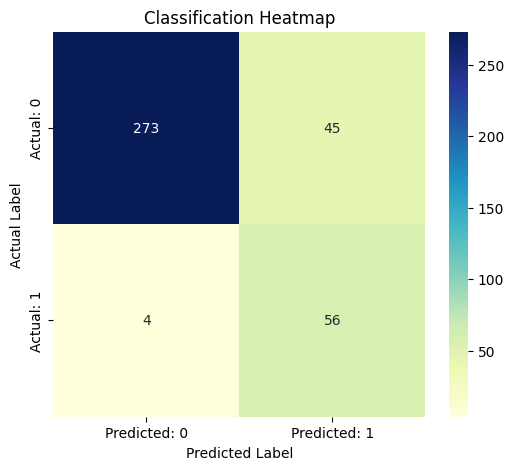

In [99]:
# Generate confusion matrix from the actual and predicted labels
conf_matrix = confusion_matrix(data['validated_label'], data['m_label'])

# Plotting the heatmap dynamically
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=True,
            xticklabels=["Predicted: 0", "Predicted: 1"],
            yticklabels=["Actual: 0", "Actual: 1"])

# Adding a dynamic title (model name can be customized if provided)
plt.title(f"Classification Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

# Display the plot
plt.show()

In [92]:
data[(data['m_label']==0) & (data['validated_label']==1)]

,id,subject,label,validated_label,cleaned_body,validation,prediction_classification,classification_label,classification_score,prediction_emotions,emotion_label,emotion_score,m_label,emotion,emotion_test,thres_label
81,7cee4de8-e724-4222-ac67-7dfa4adb544d,RE: JSW_0012_Tustin Estate_Billing Cycle 4_Mec...,1,1,"Hi Ashwin, Just to stress the importance of th...",1.0,"[{'label': 'LABEL_1', 'score': 0.7060492634773...",0,0.706,"[{'label': 'neutral', 'score': 0.9155206680297...",1,0.916,0,neutral,Unknown,0
272,f2235565-caf0-4dca-bca3-d2c80613ea50,RE: TW 45 Submission,0,1,"I realised that for TW45 , you have referenced...",1.0,"[{'label': 'LABEL_0', 'score': 0.6469807624816...",1,0.647,"[{'label': 'realization', 'score': 0.831223130...",0,0.831,0,realization,Unknown,1
317,c24ca424-ef84-4e83-988d-5f353a3fcb91,FW: Level-01_Area-A Mechanical Ductwork Spool ...,1,1,"See Attached markups, please make sure all the...",1.0,"[{'label': 'LABEL_1', 'score': 0.5520072579383...",0,0.552,"[{'label': 'neutral', 'score': 0.6353988051414...",1,0.635,0,neutral,Unknown,0
354,bc7a93bf-18b8-44d7-b1f1-fd626f2f1253,RE: FW: I120-ST. REGIS-TOWER-2(ZONE-1) LEVEL-5...,1,1,Please Stick to my comment and make sure its a...,NaN,1,0,0.637,"[{'label': 'neutral', 'score': 0.5011623501777...",1,0.501,0,neutral,Unknown,0


In [96]:
data[(data['m_label']==0) & (data['validated_label']==1)]['cleaned_body'].iloc[1]

'I realised that for TW45 , you have referenced the wrong side of the road for the lift 1 and lift 2 when overlaying all the services. Also for the 2nd drawing below which is the gas plan, the diameter 200mm gas pipe should be near the road kerbs. Please revise your TW45 drawing and send me today.'

In [2]:
response = {
        "image_path": "test1",
        "detection_count": "test2"
    }

In [5]:
response["detection_count"]

'test2'